## 1. Синтез и фильтрация М-последовательностей
#### 1.1
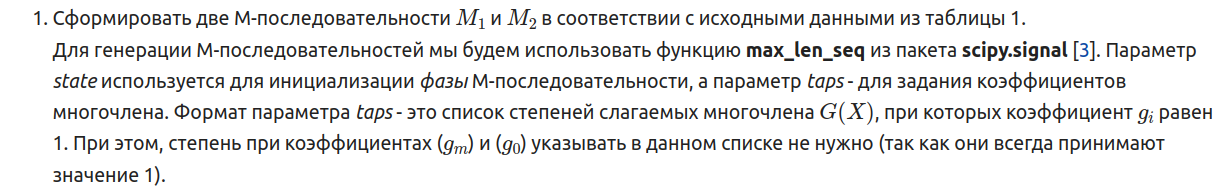<br>


taps1: [ 0.  4.  5.  8. 10.]
taps2: [ 0.  4.  5.  7.  8.  9. 10.]
M1_seq:     [1 0 0 ... 0 1 1]
M1_seq_len: 1023
M2_seq:     [1 0 0 ... 0 1 0]
M2_seq_len: 1023
M1_seq_sign: [-1  1  1 ...  1 -1 -1]
M2_seq_sign: [-1  1  1 ...  1 -1  1]
<class 'numpy.int32'>


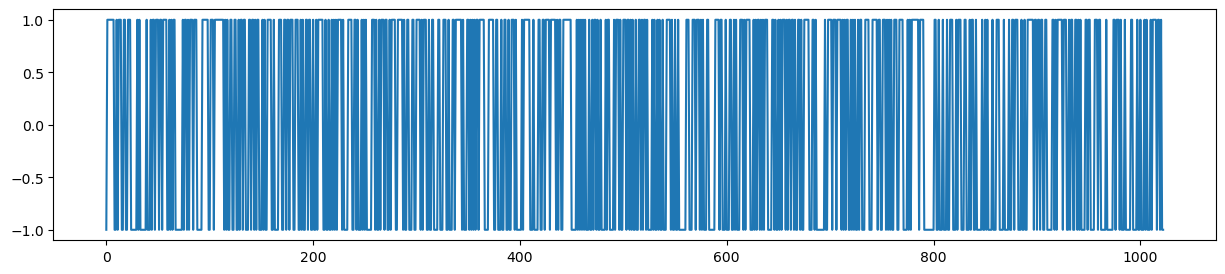

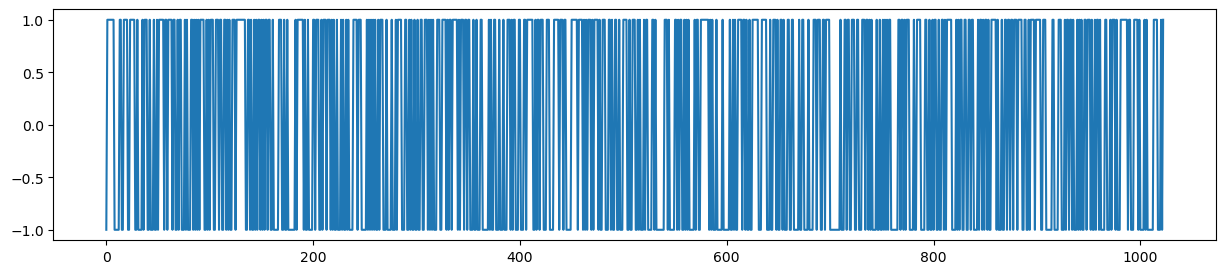

In [1]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

A  = np.array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])     # phase
C1 = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])  # characteristic polynomial #1
C2 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])  # characteristic polynomial #2

taps1 = np.array([])
taps2 = np.array([])

for i in range(0, len(C1)):
  if C1[i] != 0:
    taps1 = np.append(taps1, i)
  if C2[i] != 0:
    taps2 = np.append(taps2, i)

print(f'taps1: {taps1}\ntaps2: {taps2}')

M_seq_len = len(A)

M1 = scipy.signal.max_len_seq(nbits=M_seq_len, state=A, taps=taps1)
M2 = scipy.signal.max_len_seq(nbits=M_seq_len, state=A, taps=taps2)

print(f'M1_seq:     {M1[0]}')
print(f'M1_seq_len: {len(M1[0])}')
print(f'M2_seq:     {M2[0]}')
print(f'M2_seq_len: {len(M2[0])}')

# cast to np.array
M1_arr = np.array(M1[0], dtype=np.int32)
M2_arr = np.array(M2[0], dtype=np.int32)

# getting M1 levels
for i in range(0, len(M1_arr)):
  M1_arr[i] = 1 if (M1_arr[i] == 0) else -1

# getting M2 levels
for i in range(0, len(M2_arr)):
  M2_arr[i] = 1 if (M2_arr[i] == 0) else -1

print(f'M1_seq_sign: {M1_arr}')
print(f'M2_seq_sign: {M2_arr}')

print(type(M1_arr[0]))

plt.figure(figsize=(15, 3))
plt.plot(M1_arr)
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(M2_arr)
plt.show()

#### 1.2
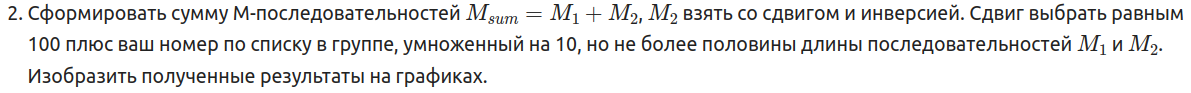

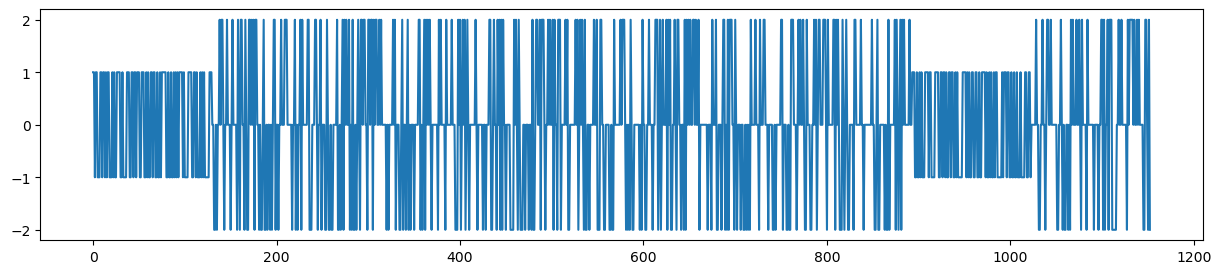

In [2]:
shift_l = 100 + 10 * 3

# will be extended with zeros
M1_arr_extend = M1_arr.copy()
M2_arr_extend = M2_arr.copy()

# pushing to end 0 'shift_l' times
for i in range (0, shift_l):
  M1_arr_extend = np.append(M1_arr_extend, 0)
  M2_arr_extend = np.append(M2_arr_extend, 0)

# inverting M2
M2_arr_extended_inv = np.array([])

for i in M2_arr_extend:
  to_push = i;
  if i == 1:
    to_push = -1
  if i == -1:
    to_push = 1

  M2_arr_extended_inv = np.append(M2_arr_extended_inv, to_push)

M1_arr_extend       = np.roll(M1_arr_extend,       -shift_l)
M2_arr_extended_inv = np.roll(M2_arr_extended_inv,  shift_l)

Msum = M1_arr_extend + M2_arr_extended_inv

plt.figure(figsize=(15, 3))
plt.plot(Msum)
plt.show()

#### 1.3
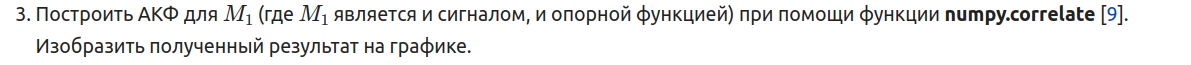

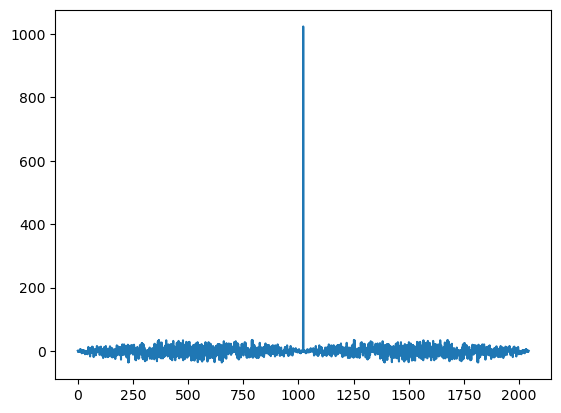

In [3]:
AKF = np.correlate(M1_arr, M1_arr, 'full')
plt.plot(AKF)
plt.show()

#### 1.4
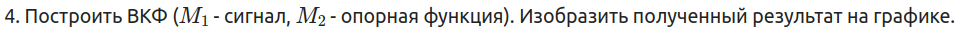

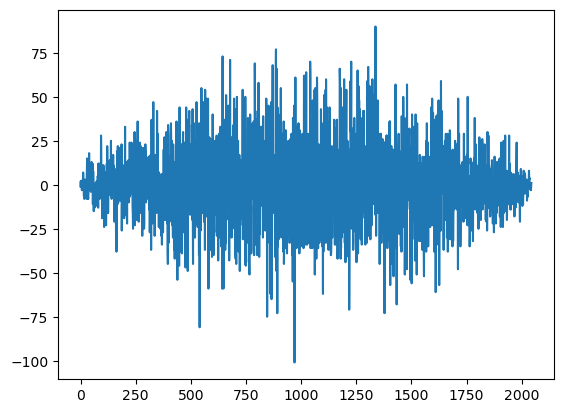

In [4]:
VKF = np.correlate(M1_arr, M2_arr, 'full')
plt.plot(VKF)
plt.show()

#### 1.5
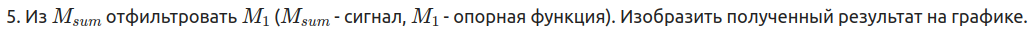

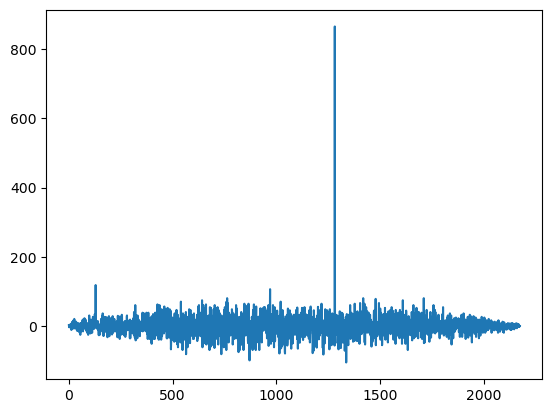

In [5]:
M1_filter = np.correlate(M1_arr, Msum, 'full')
plt.plot(M1_filter)
plt.show()

#### 1.6
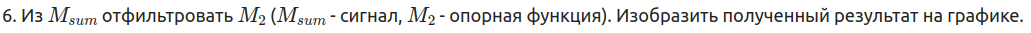

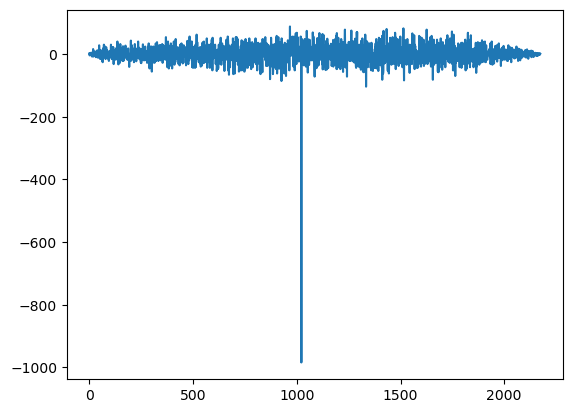

In [6]:
M2_filter = np.correlate(M2_arr, Msum, 'full')
plt.plot(M2_filter)
plt.show()